# 02. Getting Started

The goal of this module is to create `polars` dataframes in memory and by loading data; become familiar with `polars`'s lazy-mode versus in-memory mode; understand how to leverage `polars`'s query optimization; and become familiar with how to generate some basic summary statistics about a dataframe.

If you had any issues installing the environment, please write me directly: benfeifke@gmail.com.

## 2.0. Importing Polars

In [1]:
import polars as pl

## 2.1. Creating a `pl.DataFrame`

The main entrypoint to any work we'll do in `polars` is the dataframe. If you're familiar with creating a dataframe in `pandas`, creating a dataframe in `polars` is very similar:

In [3]:
scratch_df = pl.DataFrame({
    "customer_id": [1, 2, 3,],
    "first_name": ["dan", "stan", "jan",],
    "last_name": ["hanson", "flanson", "ransom",],
})

In a Jupyter Notebook, we can easily display the dataframe:

In [4]:
display(scratch_df)

customer_id,first_name,last_name
i64,str,str
1,"""dan""","""hanson"""
2,"""stan""","""flanson"""
3,"""jan""","""ransom"""


Or `polars` offers a great output style if we're printing it as if we're in the console:

In [5]:
print(scratch_df)

shape: (3, 3)
┌─────────────┬────────────┬───────────┐
│ customer_id ┆ first_name ┆ last_name │
│ ---         ┆ ---        ┆ ---       │
│ i64         ┆ str        ┆ str       │
╞═════════════╪════════════╪═══════════╡
│ 1           ┆ dan        ┆ hanson    │
│ 2           ┆ stan       ┆ flanson   │
│ 3           ┆ jan        ┆ ransom    │
└─────────────┴────────────┴───────────┘


We already see some cool things, like the way that `polars` explicitly tells us the shape and dtypes of the dataframe when we print it. But you didn't come here for fake data, did you? Let's load some real data!

## 2.2. Reading Data From `csv`

The data used throughout this course will be data from taxi rides in New York City, offered publicly by the city: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page (see a detailed description of the schema of this dataset [here](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)).

There are many ways to load data in `polars`: from `csv` files, `parquet` files, `xlsx` files, or even directly from databases. We'll start with a `csv`, with the function `polars.read_csv()`.

In [6]:
df = pl.read_csv("../data/yellow_tripdata_2024-03.csv")

We can take a quick look at the data with a call to `.head()`:

In [7]:
df.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
i64,str,str,i64,f64,i64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,"""2024-03-01T00:18:51.000000000""","""2024-03-01T00:23:45.000000000""",0,1.3,1,"""N""",142,239,1,8.6,3.5,0.5,2.7,0.0,1.0,16.3,2.5,0.0
1,"""2024-03-01T00:26:00.000000000""","""2024-03-01T00:29:06.000000000""",0,1.1,1,"""N""",238,24,1,7.2,3.5,0.5,3.0,0.0,1.0,15.2,2.5,0.0
2,"""2024-03-01T00:09:22.000000000""","""2024-03-01T00:15:24.000000000""",1,0.86,1,"""N""",263,75,2,7.9,1.0,0.5,0.0,0.0,1.0,10.4,0.0,0.0
2,"""2024-03-01T00:33:45.000000000""","""2024-03-01T00:39:34.000000000""",1,0.82,1,"""N""",164,162,1,7.9,1.0,0.5,1.29,0.0,1.0,14.19,2.5,0.0
1,"""2024-03-01T00:05:43.000000000""","""2024-03-01T00:26:22.000000000""",0,4.9,1,"""N""",263,7,2,25.4,3.5,0.5,0.0,0.0,1.0,30.4,2.5,0.0


One thing that's nice about the `polars.DataFrame.head()` operation is the way that it shows the datatype of every column, making the schema explicitly clear. In this case, we have 19 columns:
1. `'VendorID'`: `Int64`
2. `'tpep_pickup_datetime'`: `String`
3. `'tpep_dropoff_datetime'`: `String`
4. `'passenger_count'`: `Int64`
5. `'trip_distance'`: `Float64`
6. `'RatecodeID'`: `Int64`
7. `'store_and_fwd_flag'`: `String`
8. `'PULocationID'`: `Int64`
9. `'DOLocationID'`: `Int64`
10. `'payment_type'`: `Int64`
11. `'fare_amount'`: `Float64`
12. `'extra'`: `Float64`
13. `'mta_tax'`: `Float64`
14. `'tip_amount'`: `Float64`
15. `'tolls_amount'`: `Float64`
16. `'improvement_surcharge'`: `Float64`
17. `'total_amount'`: `Float64`
18. `'congestion_surcharge'`: `Float64`
19. `'Airport_fee'`: `Float64`

You might have noticed something strange--why are `tpep_pickup_datetime` and `tpep_dropoff_datetime` recognized as a `string` datatype? After all, they look a lot like datetimes...

Well, `polars.read_csv()` doesn't do much to detect datatypes beyond strings and numbers upon reading in data... unless of course you ask it to! This can be done with a simple inclusion of the `schema_overrides` argument to the `polars.read_csv()` call:

In [10]:
df = pl.read_csv(
    "../data/yellow_tripdata_2024-03.csv",
    schema_overrides={"tpep_pickup_datetime": pl.Datetime, "tpep_dropoff_datetime": pl.Datetime}#, "passenger_count": pl.Datetime}
)
df.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
i64,datetime[μs],datetime[μs],i64,f64,i64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,2024-03-01 00:18:51,2024-03-01 00:23:45,0,1.3,1,"""N""",142,239,1,8.6,3.5,0.5,2.7,0.0,1.0,16.3,2.5,0.0
1,2024-03-01 00:26:00,2024-03-01 00:29:06,0,1.1,1,"""N""",238,24,1,7.2,3.5,0.5,3.0,0.0,1.0,15.2,2.5,0.0
2,2024-03-01 00:09:22,2024-03-01 00:15:24,1,0.86,1,"""N""",263,75,2,7.9,1.0,0.5,0.0,0.0,1.0,10.4,0.0,0.0
2,2024-03-01 00:33:45,2024-03-01 00:39:34,1,0.82,1,"""N""",164,162,1,7.9,1.0,0.5,1.29,0.0,1.0,14.19,2.5,0.0
1,2024-03-01 00:05:43,2024-03-01 00:26:22,0,4.9,1,"""N""",263,7,2,25.4,3.5,0.5,0.0,0.0,1.0,30.4,2.5,0.0


Now `"tpep_pickup_datetime"` and `"tpep_dropoff_datetime"` are parsed as datetimes, just as we wanted.

This is one of the greatest strenghts of `polars`: easily managing data types and making them organized and transparent for users. This might not seem like a big deal right now, but when it comes time to do complex operations on columns, you'll very much appreciate this! But more on that in a few modules. For now, what else can we learn about this data?

We can see the shape of the whole dataframe with `pl.DataFrame.shape`:

In [12]:
df.shape

(3582628, 19)

That's a lot of data! We can also see a brief set of summary statistics about the dataframe with `pl.DataFrame.describe()`:

In [13]:
df.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",3.582628e6,"""3582628""","""3582628""",3.156438e6,3.582628e6,3.156438e6,"""3156438""",3.582628e6,3.582628e6,3.582628e6,3.582628e6,3.582628e6,3.582628e6,3.582628e6,3.582628e6,3.582628e6,3.582628e6,3.156438e6,3.156438e6
"""null_count""",0.0,"""0""","""0""",426190.0,0.0,426190.0,"""426190""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,426190.0,426190.0
"""mean""",1.758135,"""2024-03-16 13:36:21.144780""","""2024-03-16 13:53:01.505051""",1.337625,4.517412,2.255811,null,164.210534,163.156381,1.076212,18.682512,1.363928,0.482816,3.190803,0.541547,0.974287,27.12057,2.25238,0.142545
"""std""",0.431201,null,null,0.84003,302.411739,10.67769,null,64.470651,69.569802,0.64724,18.120599,1.808785,0.121177,4.032913,2.157286,0.223011,22.832365,0.837835,0.491772
"""min""",1.0,"""2002-12-31 22:17:10""","""2002-12-31 22:42:24""",0.0,0.0,1.0,"""N""",1.0,1.0,0.0,-800.0,-7.5,-0.5,-300.0,-84.3,-1.0,-800.99,-2.5,-1.75
"""25%""",2.0,"""2024-03-08 20:50:42""","""2024-03-08 21:05:46""",1.0,1.01,1.0,null,132.0,113.0,1.0,9.3,0.0,0.5,0.0,0.0,1.0,15.48,2.5,0.0
"""50%""",2.0,"""2024-03-16 10:54:00""","""2024-03-16 11:08:28""",1.0,1.75,1.0,null,161.0,162.0,1.0,13.5,1.0,0.5,2.52,0.0,1.0,20.52,2.5,0.0
"""75%""",2.0,"""2024-03-23 23:37:26""","""2024-03-23 23:52:31""",1.0,3.3,1.0,null,233.0,234.0,1.0,21.55,2.5,0.5,4.1,0.0,1.0,29.4,2.5,0.0
"""max""",6.0,"""2024-04-01 00:34:55""","""2024-04-02 18:08:46""",9.0,176836.3,99.0,"""Y""",265.0,265.0,4.0,900.0,14.25,35.84,999.99,163.0,1.0,1021.99,2.5,1.75


Here we can see how many null and non-null values are in each column, the average and standard deviation of each column, and the key quantiles of each column.

Now, it's time to get lazy... let's try loading data with `polars` in lazy mode!

## 2.3. Scanning Data From `csv`

As we mentioned in the previous module, `polars` supports two ways of loading and processing data: the in-memory mode with `DataFrame`, and the lazy mode with `LazyFrame`. With `DataFrame`, all operations are executed as they are written; with `LazyFrame`, however, operations are optimized before they are executed.

The most common way to enter lazy mode is by starting with `polars.scan_csv()` instead of `polars.read_csv()`:

In [14]:
lf = pl.scan_csv(
    "../data/yellow_tripdata_2024-03.csv",
    schema_overrides={"tpep_pickup_datetime": pl.Datetime, "tpep_dropoff_datetime": pl.Datetime}
)

That's right--we can use the `schema_overrides` argument with `polars.scan_csv()` as well! `polars.scan_csv()` supports (almost) all the same input arguments as `polars.read_csv()`, making it easy to work with.

As in the last section, let's do `head()` to take a look at the data.

In [15]:
lf.head()

Hey, that's not a dataframe!

When working with a `LazyFrame`, it's better to think of it as a "query" rather than as a "dataframe". To this end, displaying a `LazyFrame` object doesn't show the data result; rather, **it shows you what the computer is going to do to get you the data result**.

In this case (reading the graph in the image from bottom to top), polars will:
- `pl.scan_csv(...)`: scan the csv, selecting all columns ("π \*/19") and filtering None ("σ None").
- `.head()`: Take the first five rows ("SLICE offset: 0; len: 5").

_Note: If this didn't work for you, you need to install `graphviz`. You can read more about how to do that on the [`graphviz` website](https://graphviz.org/download/)._

_Another note: If the syntax here with π and σ looks weird to you, that's relational algebra, the formal algebra and notation underlying relational data (i.e. columnar data). For a deeper look into that, check out [the Wikipedia page about it](https://en.wikipedia.org/wiki/Relational_algebra)._

You might also notice that, the graph instructs us to *"run **LazyFrame.show_graph()** to see the optimized version"*. Let's do that!

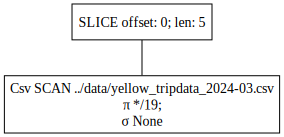

In [16]:
lf.head().show_graph()

Looks the same as the naive query plan--nothing to optimize here! Either way, we can see the result of the data with a call to `.collect()`:

In [17]:
lf.head().collect()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
i64,datetime[μs],datetime[μs],i64,f64,i64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,2024-03-01 00:18:51,2024-03-01 00:23:45,0,1.3,1,"""N""",142,239,1,8.6,3.5,0.5,2.7,0.0,1.0,16.3,2.5,0.0
1,2024-03-01 00:26:00,2024-03-01 00:29:06,0,1.1,1,"""N""",238,24,1,7.2,3.5,0.5,3.0,0.0,1.0,15.2,2.5,0.0
2,2024-03-01 00:09:22,2024-03-01 00:15:24,1,0.86,1,"""N""",263,75,2,7.9,1.0,0.5,0.0,0.0,1.0,10.4,0.0,0.0
2,2024-03-01 00:33:45,2024-03-01 00:39:34,1,0.82,1,"""N""",164,162,1,7.9,1.0,0.5,1.29,0.0,1.0,14.19,2.5,0.0
1,2024-03-01 00:05:43,2024-03-01 00:26:22,0,4.9,1,"""N""",263,7,2,25.4,3.5,0.5,0.0,0.0,1.0,30.4,2.5,0.0


Now you can load `csv`'s the in-memory way, and the lazy way--great! Now, let's actually do something beyond just loading... something that will trigger the query optimization engine...

## 2.4. Selecting Data

Now that we have the data loaded--both as a `polars.DataFrame` and as a `polars.LazyFrame`--it's time to start querying it! Let's start with the most straightforward: selecting.

If you're coming from `pandas`, the notation for selecting columns is with brackets, like `pandas.Dataframe[]`; if you're coming from `SQL`, the notation is `SELECT`. `Polars` is more like `SQL`, the notation is `polars.DataFrame.select()`.

Suppose we only want to know the pickup and dropoff time of each taxi ride...

In [18]:
(
    df
    .select(["tpep_pickup_datetime", "tpep_dropoff_datetime"])
    .head()
)

tpep_pickup_datetime,tpep_dropoff_datetime
datetime[μs],datetime[μs]
2024-03-01 00:18:51,2024-03-01 00:23:45
2024-03-01 00:26:00,2024-03-01 00:29:06
2024-03-01 00:09:22,2024-03-01 00:15:24
2024-03-01 00:33:45,2024-03-01 00:39:34
2024-03-01 00:05:43,2024-03-01 00:26:22


Easy! Let's see what that looks like with the `LazyFrame`:

In [20]:
(
    lf
    .select(["tpep_pickup_datetime", "tpep_dropoff_datetime"])
    .head()
)

Again, you can see the naively sequential order of the query in the naive query plan:
- `pl.scan_csv(...)`: scan the csv, selecting all columns ("π \*/19") and filtering None ("σ None").
- `.select(...)`: select two columns ("π 2/2").
- `.head()`: Take the first five rows ("SLICE offset: 0; len: 5").

But let's see what `Polars` will *actually* do to execute the query:

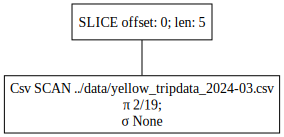

In [21]:
(
    lf
    .select(["tpep_pickup_datetime", "tpep_dropoff_datetime"])
    .head()
    .show_graph()
)

It's different! Rather than the naive query plan, in which all 19 columns are selected during the data loading, only to be selected down to 2 columns immediately thereafter, the optimized query plan shows that the two columns `"tpep_pickup_datetime"` and `"tpep_dropoff_datetime"` are being selected **while** the CSV is being read! This means that **the other 17 columns are never loaded into memory**, giving your code a massive boost in storage performance, and run performance during reading.

Let's run the query:

In [22]:
(
    lf
    .select(["tpep_pickup_datetime", "tpep_dropoff_datetime"])
    .head()
    .collect()
)

tpep_pickup_datetime,tpep_dropoff_datetime
datetime[μs],datetime[μs]
2024-03-01 00:18:51,2024-03-01 00:23:45
2024-03-01 00:26:00,2024-03-01 00:29:06
2024-03-01 00:09:22,2024-03-01 00:15:24
2024-03-01 00:33:45,2024-03-01 00:39:34
2024-03-01 00:05:43,2024-03-01 00:26:22


And the result is identical to doing it with `DataFrame`! But before moving on, let's see--how much of a boost to run-performance did we get?

In [23]:
%%timeit -n 3
(
    pl.read_csv(
        "../data/yellow_tripdata_2024-03.csv",
        schema_overrides={"tpep_pickup_datetime": pl.Datetime, "tpep_dropoff_datetime": pl.Datetime}
    )
    .select(["tpep_pickup_datetime", "tpep_dropoff_datetime"])
)

624 ms ± 35.1 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [24]:
%%timeit -n 3
(
    pl.scan_csv(
        "../data/yellow_tripdata_2024-03.csv",
        schema_overrides={"tpep_pickup_datetime": pl.Datetime, "tpep_dropoff_datetime": pl.Datetime}
    )
    .select(["tpep_pickup_datetime", "tpep_dropoff_datetime"])
    .collect()
)

213 ms ± 6.78 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


Almost a 3x speed increase!

You'll also notice, again, that the syntax for selecting columns with the `polars.LazyFrame` is identical to the syntax for selecting columns with `polars.DataFrame`. In almost all cases, this is true in `Polars`--that the syntax for the two is the same, only that `polars.LazyFrame` requires a `.collect()` call to actually return data.

It's also worth mentioning here that, while we can easily convert a `pl.LazyFrame` to a `pl.DataFrame` with `.collect()`, the same can be done in the opposite direction with `pl.DataFrame.lazy()`. Let's check it out:

In [25]:
df_as_lazy = (
    pl.read_csv(
        "../data/yellow_tripdata_2024-03.csv",
        schema_overrides={"tpep_pickup_datetime": pl.Datetime, "tpep_dropoff_datetime": pl.Datetime}
    )
    .lazy()
)
type(df_as_lazy)

polars.lazyframe.frame.LazyFrame

Before moving onto the next module, let's try loading in one more file type: `parquet`.

## 2.5. Reading and Scanning From `parquet`

In the course introduction, we saw that `polars` uses the Apache Arrow columnar memory format, a memory format that's optimized for modern column-oriented analytics use-cases, where columns are more important than rows. Apache Arrow optimizes for modern column-oriented analytics use-cases by placing values in a column next to each other in memory, rather than placing values in a row next to each other in memory.

Well, there's also a file type that uses the Apache Arrow columnar memory format--`parquet`. Due to this connection, `polars` and `parquet` work very well together, and are a great toolkit for data science.

Let's try and read and scan data from parquet in the same way we did for `csv`:

In [26]:
df = pl.read_parquet("../data/yellow_tripdata_2024-03.parquet")
df.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
i32,datetime[ns],datetime[ns],i64,f64,i64,str,i32,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,2024-03-01 00:18:51,2024-03-01 00:23:45,0,1.3,1,"""N""",142,239,1,8.6,3.5,0.5,2.7,0.0,1.0,16.3,2.5,0.0
1,2024-03-01 00:26:00,2024-03-01 00:29:06,0,1.1,1,"""N""",238,24,1,7.2,3.5,0.5,3.0,0.0,1.0,15.2,2.5,0.0
2,2024-03-01 00:09:22,2024-03-01 00:15:24,1,0.86,1,"""N""",263,75,2,7.9,1.0,0.5,0.0,0.0,1.0,10.4,0.0,0.0
2,2024-03-01 00:33:45,2024-03-01 00:39:34,1,0.82,1,"""N""",164,162,1,7.9,1.0,0.5,1.29,0.0,1.0,14.19,2.5,0.0
1,2024-03-01 00:05:43,2024-03-01 00:26:22,0,4.9,1,"""N""",263,7,2,25.4,3.5,0.5,0.0,0.0,1.0,30.4,2.5,0.0


Something's changed--the `"tpep_pickup_datetime"` and `"tpep_dropoff_datetime"` get automatically read in as `datetime` data type! But why is that?

Similar to how `polars` places a high importance on data types, so does `parquet`; with this, it's possible to store columns' data types alongside the data in a `parquet` file. This is something that `csv` just can't do!

And, of course, there's also `scan_parquet()`:

In [27]:
pl.scan_parquet("../data/yellow_tripdata_2024-03.parquet").head().collect()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
i32,datetime[ns],datetime[ns],i64,f64,i64,str,i32,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,2024-03-01 00:18:51,2024-03-01 00:23:45,0,1.3,1,"""N""",142,239,1,8.6,3.5,0.5,2.7,0.0,1.0,16.3,2.5,0.0
1,2024-03-01 00:26:00,2024-03-01 00:29:06,0,1.1,1,"""N""",238,24,1,7.2,3.5,0.5,3.0,0.0,1.0,15.2,2.5,0.0
2,2024-03-01 00:09:22,2024-03-01 00:15:24,1,0.86,1,"""N""",263,75,2,7.9,1.0,0.5,0.0,0.0,1.0,10.4,0.0,0.0
2,2024-03-01 00:33:45,2024-03-01 00:39:34,1,0.82,1,"""N""",164,162,1,7.9,1.0,0.5,1.29,0.0,1.0,14.19,2.5,0.0
1,2024-03-01 00:05:43,2024-03-01 00:26:22,0,4.9,1,"""N""",263,7,2,25.4,3.5,0.5,0.0,0.0,1.0,30.4,2.5,0.0


## 2.6. Conclusion

In this module, we've learned:
- How to create a dataframe from scratch;
- How to load data to a dataframe, both from `csv` and from `parquet`, and display some basic information about it;
- How to work with in-memory mode vs lazy mode, and the performance difference that can be expected beteween the two;
- How to begin writing queries, with the `select` function, and how this is executed differently in in-memory vs lazy mode.

In the next module, "Data Manipulation I: Basics", we'll go deeper into manipulating dataframes. As a note, since this course has a more practical focus, from here on out only `DataFrame`s will be used, for syntactic brevity. As noted in this module, however, note that `DataFrame` and `LazyFrame` can almost always be used interchangeably.